## Получает ли человек больше суммы N или меньше

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### EDA Dataset

In [79]:
names = [
    'age', 'workclass', 'final_weight', 'education',
    'education-num', 'marital-status', 'occupation',
    'relationship', 'race', 'sex', 'cap-gain',
    'cap-loss', 'hours-per-week', 'native-country',
    'target'
]
dtypes = {
    'workclass': 'category',
    'education': 'category',   
    'marital-status': 'category',
    'occupation': 'category',
    'relationship': 'category',
    'race': 'category',
    'sex': 'category',
    'native-country': 'category',
    'target' : 'category'
}

categorial_columns = {
    'workclass',
    'education',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native-country',
    'target'
}

scale_columns = {'age', 
                 'final_weight',              
                 'education-num', 
                 'cap-gain', 
                 'cap-loss', 
                 'hours-per-week', 
                 }

df = pd.read_csv('./data.txt', names=names, dtype=dtypes, na_values=' ?')

print(df.shape)
# df.dropna(inplace=True)
for col in categorial_columns:
    df[col] = df[col].str.strip()

df = df[df['age'] != 'totally_legit_string']
df['age'] = df['age'].astype('int') 
df = df[df['age'] > 1]

df['hours-per-week'] = df['hours-per-week'].str.strip()
df['hours-per-week'] = df['hours-per-week'].astype('int') 

df['education-num'] = df['education-num'].str.strip()
df['education-num'] = df['education-num'].astype('int') 

df = df[df['native-country'] != '>N']
df = df[df['target'] != np.nan]

df['target'] = df['target'].map({'<=N': 0, '>N': 1})

for col in categorial_columns:    
    unique = df[col].unique()
    print('Feature: {0} unique: {1}\n'.format(col, len(unique)))
    print(unique,'\n')


(32573, 15)
Feature: sex unique: 2

['Male' 'Female'] 

Feature: occupation unique: 15

['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' nan
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv'] 

Feature: marital-status unique: 7

['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 

Feature: target unique: 2

[0 1] 

Feature: race unique: 5

['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other'] 

Feature: workclass unique: 9

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

Feature: education unique: 16

['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 

Feature: relationship unique: 6

In [80]:
report = []
for col in df.columns:
    report.append(df[col].describe())
report = pd.concat(report, axis=1)
report

,age,workclass,final_weight,education,education-num,marital-status,occupation,relationship,race,sex,cap-gain,cap-loss,hours-per-week,native-country,target
count,32561.000000,30725,3.256100e+04,32561,32561.000000,32561,30718,32561,32561,32561,32561.000000,32561.000000,32561.000000,31978,32561.000000
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,0.240810
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,0.427581
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,0.000000
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,0.000000
max,90.000000,NaN,1.484705e+06,NaN,16.000000,NaN,NaN,NaN,NaN,NaN,99999.000000,4356.000000,99.000000,NaN,1.000000
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,NaN
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,NaN


#### Unbalanced classes

Class=0: samples=22654, percentage=75.11%
Class=1: samples=7508, percentage=24.89%


<AxesSubplot:xlabel='count', ylabel='target'>

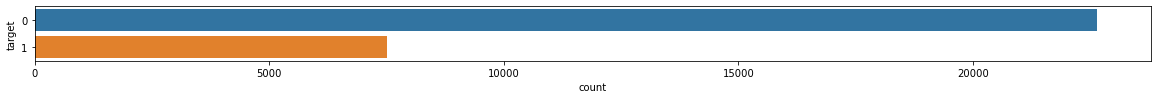

In [242]:
target = df.target
target[target == 0].count()/target.count()
total = target.count()
for i in target.unique():
    num_class = target[target == i].count()
    percentage = num_class/ total * 100
    print('Class=%s: samples=%d, percentage=%0.2f%%' % (i, num_class, percentage))

import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,1))
sns.countplot(y="target", data=df)

#### Hist plots

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'final_weight'}>,
        <AxesSubplot:title={'center':'education-num'}>],
       [<AxesSubplot:title={'center':'cap-gain'}>,
        <AxesSubplot:title={'center':'cap-loss'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>],
       [<AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

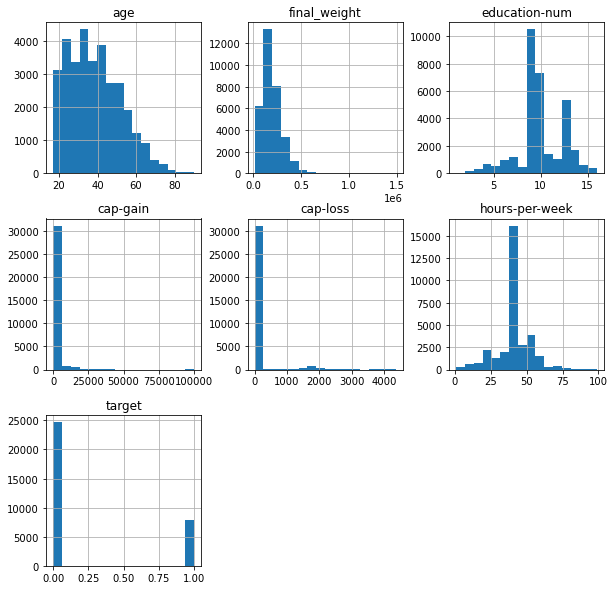

In [82]:
subset = df[df._get_numeric_data().columns]
# create a histogram plot of each numeric variable
subset.hist(bins=16, log=False, figsize=(10,10))

#### Hours-per-week

<Figure size 1440x1080 with 0 Axes>

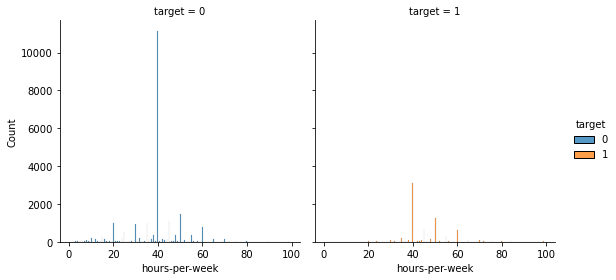

In [247]:
fig = plt.figure(figsize=(20,15)) 
sns.displot(data=df, x='hours-per-week', hue='target', col='target', height=4, aspect=1)

#### Capital

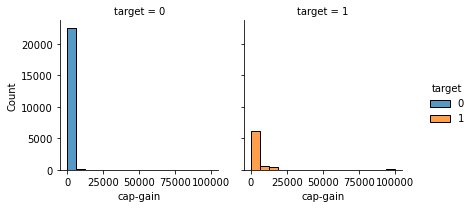

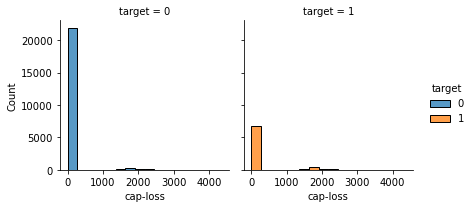

In [245]:
sns.displot(data=df, x='cap-gain', hue='target', col='target', height=3, aspect=1)
sns.displot(data=df, x='cap-loss', hue='target', col='target', height=3, aspect=1)

#### Education

In [83]:
df['education'].replace('Preschool', 'dropout',inplace=True)
df['education'].replace('10th', 'dropout',inplace=True)
df['education'].replace('11th', 'dropout',inplace=True)
df['education'].replace('12th', 'dropout',inplace=True)
df['education'].replace('1st-4th', 'dropout',inplace=True)
df['education'].replace('5th-6th', 'dropout',inplace=True)
df['education'].replace('7th-8th', 'dropout',inplace=True)
df['education'].replace('9th', 'dropout',inplace=True)
df['education'].replace('HS-Grad', 'HS-Grad',inplace=True)
df['education'].replace('HS-grad', 'HS-Grad',inplace=True)
df['education'].replace('Some-college', 'College',inplace=True)
df['education'].replace('Assoc-acdm', 'College',inplace=True)
df['education'].replace('Assoc-voc', 'College',inplace=True)
df['education'].replace('Bachelors', 'Bachelors',inplace=True)
df['education'].replace('Masters', 'Masters',inplace=True)
df['education'].replace('Prof-school', 'Masters',inplace=True)
df['education'].replace('Doctorate', 'Doctorate',inplace=True)

<Figure size 1440x1080 with 0 Axes>

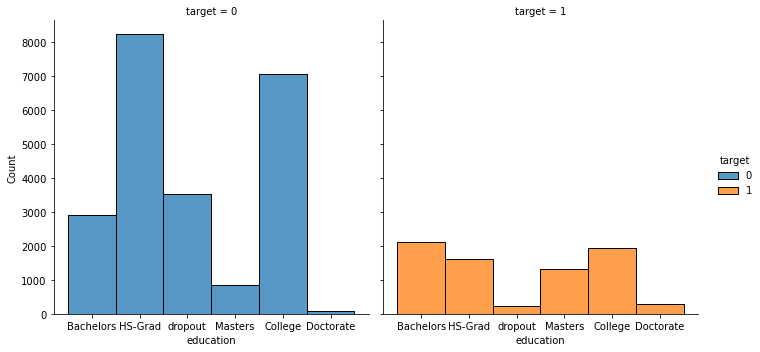

In [178]:
fig = plt.figure(figsize=(20,15)) 
sns.displot(data=df, x='education', hue='target', col='target',  kde=False)

<Figure size 1080x504 with 0 Axes>

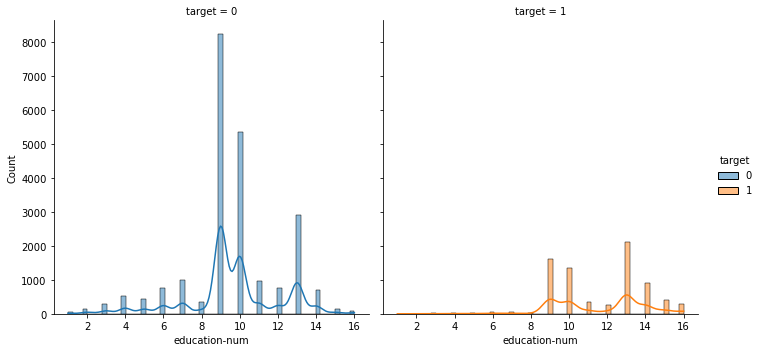

In [237]:
fig = plt.figure(figsize=(15,7)) 
sns.displot(data=df, x='education-num', hue='target', col='target',  kde=True)

#### Race

<Figure size 1440x1080 with 0 Axes>

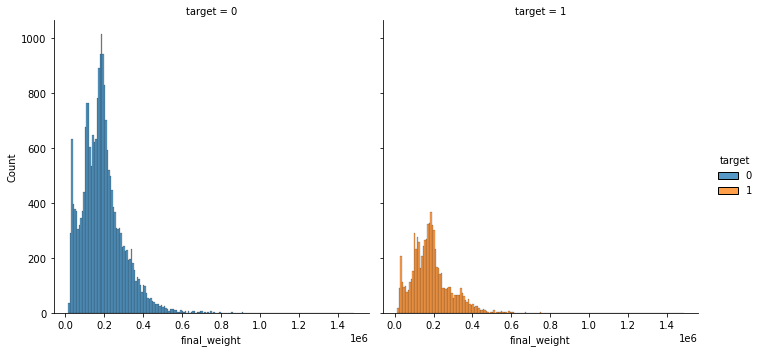

In [223]:
fig = plt.figure(figsize=(20,15)) 
sns.displot(data=df, x='final_weight', hue='target', col='target', kind='hist')

<Figure size 1440x1080 with 0 Axes>

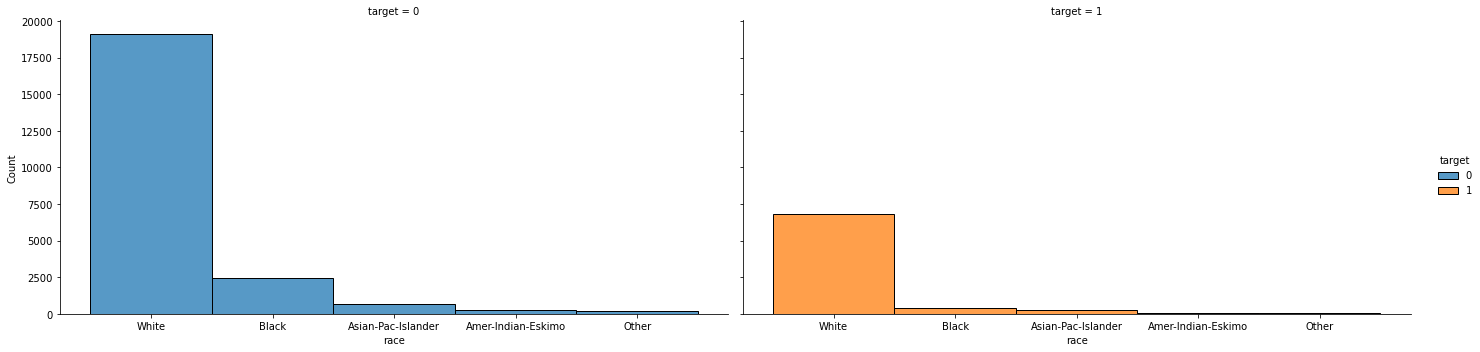

In [208]:
fig = plt.figure(figsize=(20,15)) 
sns.displot(data=df, x='race', hue='target', col='target',  kde=False, height=5, aspect=2)

#### Marital-status

In [84]:
df['marital-status'].replace('Never-married', 'NotMarried',inplace=True)
df['marital-status'].replace(['Married-AF-spouse'], 'Married',inplace=True)
df['marital-status'].replace(['Married-civ-spouse'], 'Married',inplace=True)
df['marital-status'].replace(['Married-spouse-absent'], 'NotMarried',inplace=True)
df['marital-status'].replace(['Separated'], 'Separated',inplace=True)
df['marital-status'].replace(['Divorced'], 'Separated',inplace=True)
df['marital-status'].replace(['Widowed'], 'Widowed',inplace=True)

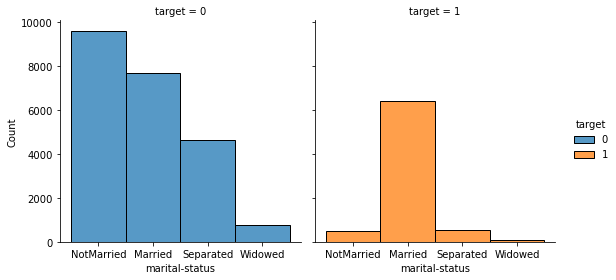

In [233]:
sns.displot(data=df, x='marital-status', hue='target', col='target',  kde=False, height=4)

#### Native-country

In [85]:
df['native-country'].replace(["Canada", "Cuba", "Dominican-Republic", "El-Salvador", "Guatemala",
                               "Haiti", "Honduras", "Jamaica", "Mexico", "Nicaragua",
                               "Outlying-US(Guam-USVI-etc)", "Puerto-Rico", "Trinadad&Tobago",
                               "United-States"], 
                              'North America',inplace=True)
df['native-country'].replace(["Cambodia", "China", "Hong", "India", "Iran", "Japan", "Laos",
                              "Philippines", "Taiwan", "Thailand", "Vietnam"], 
                              'Asia', inplace=True)
df['native-country'].replace(["Columbia", "Ecuador", "Peru"], 
                              'South America',inplace=True)
df['native-country'].replace(["England", "France", "Germany", "Greece", "Holand-Netherlands",
                                "Hungary", "Ireland", "Italy", "Poland", "Portugal", "Scotland",
                                "Yugoslavia"], 
                              'Europe',inplace=True)
# df = df.reset_index()
df.dropna(inplace=True)

<Figure size 1440x1080 with 0 Axes>

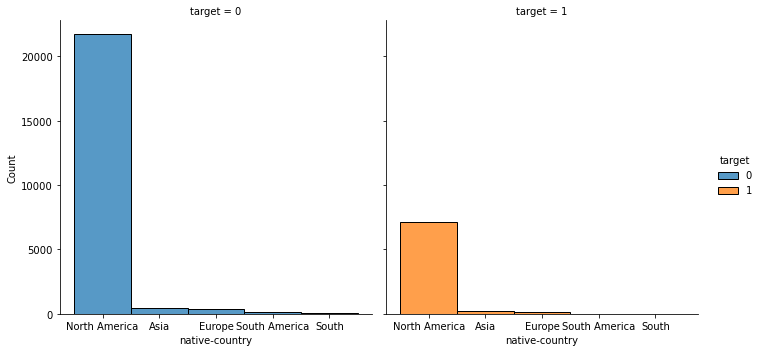

In [174]:
fig = plt.figure(figsize=(20,15)) 
sns.displot(data=df, x='native-country', hue='target', col='target',  kde=False)

#### Age

<Figure size 1440x1080 with 0 Axes>

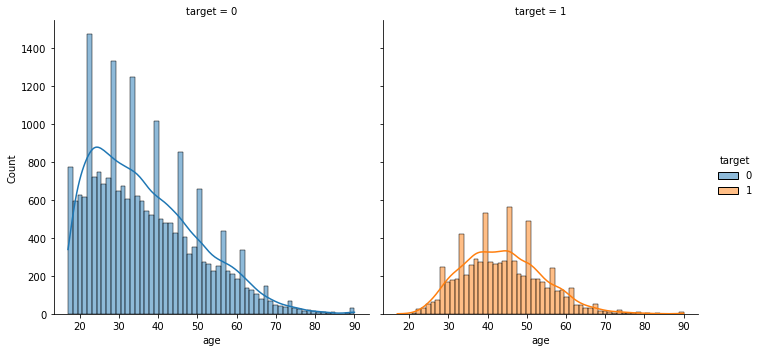

In [86]:
fig = plt.figure(figsize=(20,15)) 
sns.displot(data=df, x='age', hue='target', col='target',  kde=True)

#### Occupation

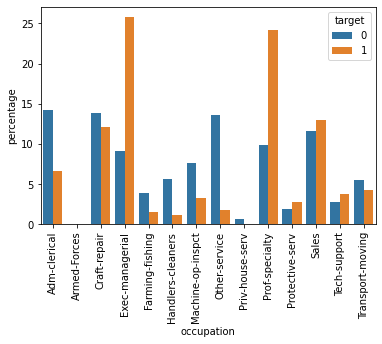

In [227]:
occupation_counts = (df.groupby(['target'])['occupation']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('occupation'))
p = sns.barplot(x="occupation", y="percentage", hue="target", data=occupation_counts)
_ = plt.setp(p.get_xticklabels(), rotation=90) 

In [91]:
df.dropna(inplace=True)

#### Train-validation split

In [148]:
X, y = df.drop('target', axis=1), df['target']
X_train, X_val, y_train, y_val = model_selection.train_test_split(X, y, shuffle=True, random_state=2021)

#### Baseline

In [155]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score

dummy_model = DummyClassifier(strategy='most_frequent')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
scores = cross_val_score(dummy_model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean roc_auc: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

scores = cross_val_score(dummy_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean roc_auc: 0.500 (0.000)
Mean accuracy: 0.751 (0.000)


#### Model selection

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

models, names = [], []
# Decision Trees
models.append(DecisionTreeClassifier())
names.append('Decision Trees')
# SVM
models.append(SVC(gamma='scale'))
names.append('SVM')
# Bagging
models.append(BaggingClassifier(n_estimators=100))
names.append('BAG')
# Random Forest
models.append(RandomForestClassifier(n_estimators=100))
names.append('Random Forest')
# GBM
models.append(GradientBoostingClassifier(n_estimators=100))
names.append('GBM')

categorial_idx=[df.columns.get_loc(c) for c in categorial_columns if c in X_train]
scale_idx=[df.columns.get_loc(c) for c in scale_columns if c in X_train]

transforms = [('categorial', OneHotEncoder(handle_unknown='ignore'), categorial_idx), 
         ('norm', MinMaxScaler(), scale_idx)]
ct = ColumnTransformer(transforms)

res = []
for model, name in zip(models, names):
    pipe = Pipeline(steps=[('transform', ct),('model', model)])
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(pipe, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    print('%s Mean ROC AUC: %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
    
    


Decision Trees Mean Accuracy: 0.748 (0.009)
SVM Mean Accuracy: 0.889 (0.006)
BAG Mean Accuracy: 0.903 (0.006)
Random Forest Mean Accuracy: 0.902 (0.006)
GBM Mean Accuracy: 0.920 (0.005)


#### Hyperparameters selection

In [160]:
import lightgbm as lgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__learning_rate': [0.01, 0.1, 1],
    'model__n_estimators': [20, 40, 100, 200],
    'model__scale_pos_weight' : [1, 3, 10],    
}

categorial_idx=[df.columns.get_loc(c) for c in categorial_columns if c in X_train]
scale_idx=[df.columns.get_loc(c) for c in scale_columns if c in X_train]

transforms = [('categorial', OneHotEncoder(handle_unknown='ignore'), categorial_idx), 
         ('norm', MinMaxScaler(), scale_idx)]
ct = ColumnTransformer(transforms)


model = lgb.LGBMClassifier(scale_pos_weight=3, 
                           n_estimators=100, 
                           learning_rate=0.1, 
                           random_state=2021, 
                           verbose=0)
pipe = Pipeline(steps=[('transform', ct),('model', model)])

grid = GridSearchCV(estimator=pipe, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
grid_result = grid.fit(X, y)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001056 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
0.903245 (0.006136) with: {'model__learning_rate': 0.01, 'model__n_estimators': 20, 'model__scale_pos_weight': 1}
0.902874 (0.006339) with: {'model__learning_rate': 0.01, 'model__n_estimators': 20, 'model__scale_pos_weight': 3}
0.896195 (0.005695) with: {'model__learning_rate': 0.01, 'model__n_estimators': 20, 'model__scale_pos_weight': 10}
0.905988 (0.006330) with: {'model__learning_rate': 0.01, 'model__n_estimators': 40, 'model__scale_pos_weight': 1}
0.905171 (0.006135) with: {'model__learning_rate': 0.01, 'model__n_estimators': 40, 'model__scale_pos_weight': 3}
0.897785 (0.005520) with: {'model__learning_rate': 0.01, 'model__n_estimators': 40, 'model__scale_pos_weight': 10}
0.911258 (0.005968) with: {'model__learning_rate': 0.01, 'model__n_estimators': 100, 

#### Cross validation

In [161]:
from sklearn.model_selection import cross_val_score

categorial_idx=[df.columns.get_loc(c) for c in categorial_columns if c in X_train]
scale_idx=[df.columns.get_loc(c) for c in scale_columns if c in X_train]

transforms = [('categorial', OneHotEncoder(handle_unknown='ignore'), categorial_idx), 
         ('norm', MinMaxScaler(), scale_idx)]
ct = ColumnTransformer(transforms)


model = lgb.LGBMClassifier(scale_pos_weight=3, 
                           n_estimators=100, 
                           learning_rate=0.1, 
                           random_state=2021, 
                           verbose=0)
pipe = Pipeline(steps=[('transform', ct),('model', model)])

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

scores = cross_val_score(pipe, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('%s Mean ROC AUC: %.3f (%.3f)' % ('LGBMClassifier', np.mean(scores), np.std(scores)))
scores = cross_val_score(pipe, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('%s Mean accuracy: %.3f (%.3f)' % ('LGBMClassifier', np.mean(scores), np.std(scores)))

LGBMClassifier Mean roc_auc: 0.926 (0.006)
LGBMClassifier Mean accuracy: 0.833 (0.007)


#### Validation metrics

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000834 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
LGBMClassifier test roc_auc: 0.841
LGBMClassifier test accuracy: 0.836


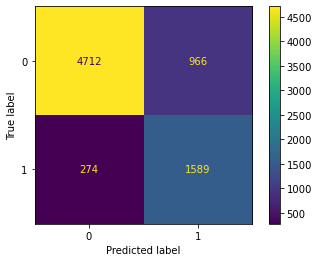

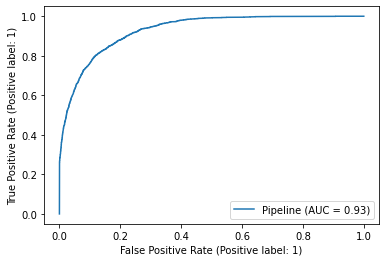

In [164]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)
roc_auc_test = roc_auc_score(y_val, y_pred)
accuracy_test = accuracy_score(y_val, y_pred)
confusion_matrix_test = confusion_matrix(y_val, y_pred)
print('%s test ROC AUC: %.3f' % ('LGBMClassifier', roc_auc_test))
print('%s test accuracy: %.3f' % ('LGBMClassifier', accuracy_test))
plot_confusion_matrix(pipe, X_val, y_val)
plot_roc_curve(pipe, X_val, y_val)

#### Test metrics

In [ ]:
names = [
    'age', 'workclass', 'final_weight', 'education',
    'education-num', 'marital-status', 'occupation',
    'relationship', 'race', 'sex', 'cap-gain',
    'cap-loss', 'hours-per-week', 'native-country',
    'target'
]
df_test = pd.read_csv('./test.txt', names=names, dtype=dtypes, na_values=' ?')
print(df_test.shape)
# df_test.dropna(inplace=True)
for col in categorial_columns:
    df_test[col] = df_test[col].str.strip()


df_test = df_test[df_test['age'] != 'fssafsa121321ewd1231e2']
df_test['age'] = df_test['age'].astype('int') 
df_test = df_test[df_test['age'] > 1]

# df_test['hours-per-week'] = df_test['hours-per-week'].str.strip()
df_test['hours-per-week'] = df_test['hours-per-week'].astype('int') 

# df_test['education-num'] = df_test['education-num'].str.strip()
df_test['education-num'] = df_test['education-num'].astype('int') 

# df_test = df_test[df_test['native-country'] != '>N']
# df_test = df_test[df_test['target'] != np.nan]

df_test['target'] = df_test['target'].map({'<=N.': 0, '>N.': 1})

df_test['education'].replace('Preschool', 'dropout',inplace=True)
df_test['education'].replace('10th', 'dropout',inplace=True)
df_test['education'].replace('11th', 'dropout',inplace=True)
df_test['education'].replace('12th', 'dropout',inplace=True)
df_test['education'].replace('1st-4th', 'dropout',inplace=True)
df_test['education'].replace('5th-6th', 'dropout',inplace=True)
df_test['education'].replace('7th-8th', 'dropout',inplace=True)
df_test['education'].replace('9th', 'dropout',inplace=True)
df_test['education'].replace('HS-Grad', 'HS-Grad',inplace=True)
df_test['education'].replace('HS-grad', 'HS-Grad',inplace=True)
df_test['education'].replace('Some-college', 'College',inplace=True)
df_test['education'].replace('Assoc-acdm', 'College',inplace=True)
df_test['education'].replace('Assoc-voc', 'College',inplace=True)
df_test['education'].replace('Bachelors', 'Bachelors',inplace=True)
df_test['education'].replace('Masters', 'Masters',inplace=True)
df_test['education'].replace('Prof-school', 'Masters',inplace=True)
df_test['education'].replace('Doctorate', 'Doctorate',inplace=True)

df_test['marital-status'].replace('Never-married', 'NotMarried',inplace=True)
df_test['marital-status'].replace(['Married-AF-spouse'], 'Married',inplace=True)
df_test['marital-status'].replace(['Married-civ-spouse'], 'Married',inplace=True)
df_test['marital-status'].replace(['Married-spouse-absent'], 'NotMarried',inplace=True)
df_test['marital-status'].replace(['Separated'], 'Separated',inplace=True)
df_test['marital-status'].replace(['Divorced'], 'Separated',inplace=True)
df_test['marital-status'].replace(['Widowed'], 'Widowed',inplace=True)

df_test['native-country'].replace(["Canada", "Cuba", "Dominican-Republic", "El-Salvador", "Guatemala",
                               "Haiti", "Honduras", "Jamaica", "Mexico", "Nicaragua",
                               "Outlying-US(Guam-USVI-etc)", "Puerto-Rico", "Trinadad&Tobago",
                               "United-States"], 
                              'North America',inplace=True)
df_test['native-country'].replace(["Cambodia", "China", "Hong", "India", "Iran", "Japan", "Laos",
                              "Philippines", "Taiwan", "Thailand", "Vietnam"], 
                              'Asia', inplace=True)
df_test['native-country'].replace(["Columbia", "Ecuador", "Peru"], 
                              'South America',inplace=True)
df_test['native-country'].replace(["England", "France", "Germany", "Greece", "Holand-Netherlands",
                                "Hungary", "Ireland", "Italy", "Poland", "Portugal", "Scotland",
                                "Yugoslavia"], 
                              'Europe',inplace=True)
# df_test = df_test.reset_index()
# df_test.dropna(inplace=True)

LGBMClassifier test roc_auc: 0.841
LGBMClassifier test accuracy: 0.835


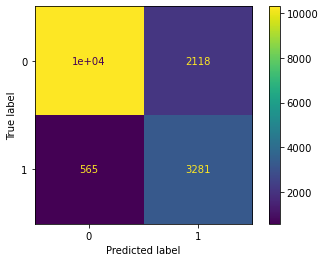

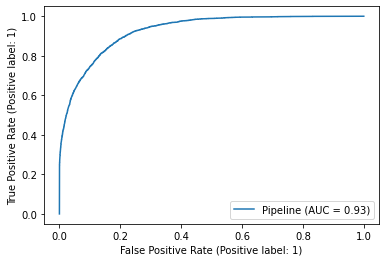

In [168]:
X_test, y_test = df_test.drop('target', axis=1), df_test['target']

y_pred = pipe.predict(X_test)
roc_auc_test = roc_auc_score(y_test, y_pred)
accuracy_test = accuracy_score(y_test, y_pred)
confusion_matrix_test = confusion_matrix(y_test, y_pred)
print('%s test ROC AUC: %.3f' % ('LGBMClassifier', roc_auc_test))
print('%s test accuracy: %.3f' % ('LGBMClassifier', accuracy_test))
plot_confusion_matrix(pipe, X_test, y_test)
plot_roc_curve(pipe, X_test, y_test)